In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, classification_report

In [28]:
df = pd.read_csv("C:/Users/bharg/Desktop/Hackathon/Exercise.csv")

In [29]:
print("Dataset Overview:\n", df.head())
print("\nMissing Values:\n", df.isnull().sum())
print("\nDataset Info:\n")
df.info()


Dataset Overview:
    ID     Exercise  Calories Burn  Dream Weight  Actual Weight  Age  Gender  \
0   1   Exercise 2     286.959851     91.892531      96.301115   45    Male   
1   2   Exercise 7     343.453036     64.165097      61.104668   25    Male   
2   3   Exercise 4     261.223465     70.846224      71.766724   20    Male   
3   4   Exercise 5     127.183858     79.477008      82.984456   33    Male   
4   5  Exercise 10     416.318374     89.960226      85.643174   29  Female   

   Duration  Heart Rate        BMI Weather Conditions  Exercise Intensity  
0        37         170  29.426275              Rainy                   5  
1        43         142  21.286346              Rainy                   5  
2        20         148  27.899592             Cloudy                   4  
3        39         170  33.729552              Sunny                  10  
4        34         118  23.286113             Cloudy                   3  

Missing Values:
 ID                    0
Exercise

In [30]:
df.fillna(df.mean(numeric_only=True), inplace=True)


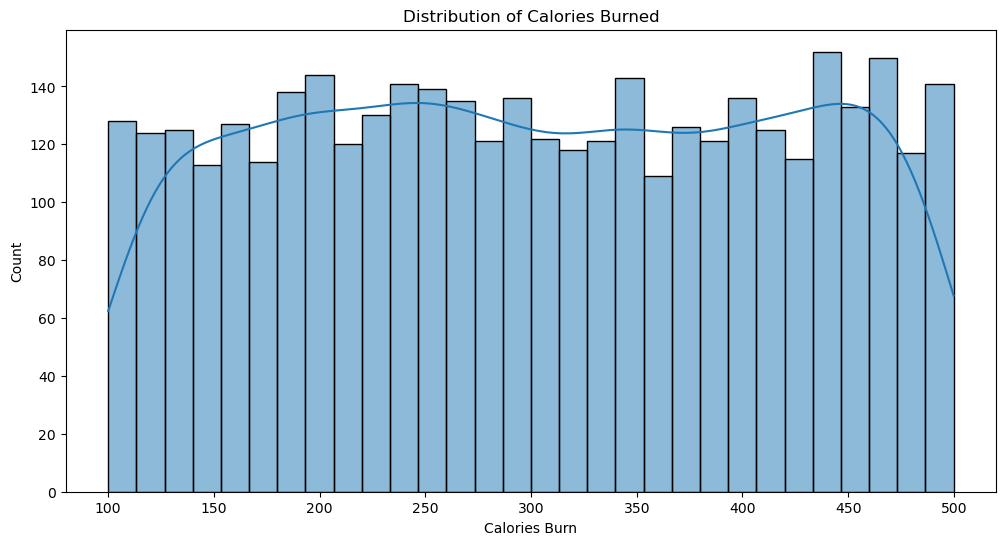

In [31]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Calories Burn'], bins=30, kde=True)
plt.title("Distribution of Calories Burned")
plt.show()

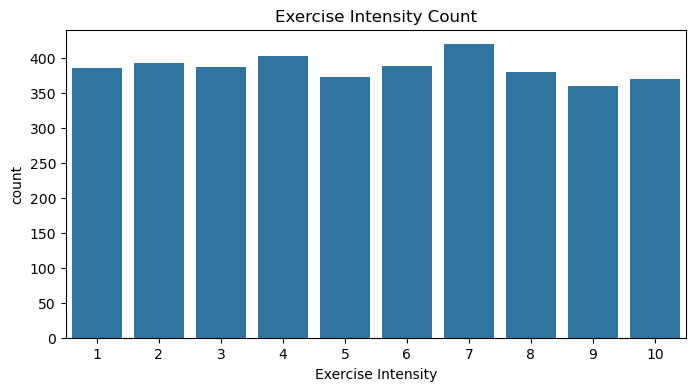

In [32]:
plt.figure(figsize=(8, 4))
sns.countplot(x=df['Exercise Intensity'])
plt.title("Exercise Intensity Count")
plt.show()

In [33]:
def preprocess_data(df):
    label_enc = LabelEncoder()
    df['Gender'] = label_enc.fit_transform(df['Gender'])
    df['Weather Conditions'] = label_enc.fit_transform(df['Weather Conditions'])
    df['Exercise'] = label_enc.fit_transform(df['Exercise'])
    
    features = ['Calories Burn', 'Dream Weight', 'Actual Weight', 'Age', 'Gender', 
                'Duration', 'Heart Rate', 'BMI', 'Weather Conditions', 'Exercise Intensity']
    
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[features])
    
    return df, df_scaled, scaler

df, df_scaled, scaler = preprocess_data(df)

In [34]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
train_scaled, test_scaled = train_test_split(df_scaled, test_size=0.2, random_state=42)
print("Train size:", train_data.shape, "Test size:", test_data.shape)

Train size: (3091, 12) Test size: (773, 12)


In [35]:
def recommend_exercises(user_input, df, df_scaled, top_n=5):
    for key in df.columns[2:]:
        if key not in user_input or user_input[key] is None:
            user_input[key] = df[key].mean()
    
    user_df = pd.DataFrame([user_input], columns=df.columns[2:])
    
    user_scaled = scaler.transform(user_df)
    
    similarity_scores = cosine_similarity(user_scaled, df_scaled)
    
    top_indices = np.argsort(similarity_scores[0])[-top_n:][::-1]
    recommended_exercises = df.iloc[top_indices]['Exercise']
    
    return recommended_exercises.values

In [36]:
user_input = {
    'Calories Burn': None, 
    'Dream Weight': 80,
    'Actual Weight': 100,  
    'Age': 30,
    'Gender': 1, 
    'Duration': None,  
    'Heart Rate': 140,
    'BMI': None, 
    'Weather Conditions': 2,  
    'Exercise Intensity': 5
}

In [37]:
recommendations = recommend_exercises(user_input, df, df_scaled)
print("Recommended Exercises:", recommendations)
exercise_mapping = {
    1: "Brisk Walking",
    2: "Jump Rope",
    3: "Cycling",
    4: "Running",
    5: "Strength Training",
    6: "Swimming",
    7: "Yoga",
    8: "HIIT (High-Intensity Interval Training)",
    9: "Rowing",
    10: "Stair Climbing"
}

# Convert numbers to exercise names
exercise_names = [exercise_mapping.get(ex, f"Exercise {ex}") for ex in recommendations]

# Print the recommended exercises
print("Recommended Exercises:", exercise_names)



Recommended Exercises: [9 9 4 5 7]
Recommended Exercises: ['Rowing', 'Rowing', 'Running', 'Strength Training', 'Yoga']


In [38]:
actual_exercises = test_data['Exercise'].values
predicted_exercises = [recommend_exercises(row, df, df_scaled, top_n=1)[0] for _, row in test_data.iterrows()]

In [39]:
print("\nValidation Accuracy:", accuracy_score(actual_exercises, predicted_exercises))
print("\nClassification Report:\n", classification_report(actual_exercises, predicted_exercises))



Validation Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00        79
           4       1.00      1.00      1.00        73
           5       1.00      1.00      1.00        63
           6       1.00      1.00      1.00        86
           7       1.00      1.00      1.00        77
           8       1.00      1.00      1.00        69
           9       1.00      1.00      1.00        92

    accuracy                           1.00       773
   macro avg       1.00      1.00      1.00       773
weighted avg       1.00      1.00      1.00       773

